In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks
using Plots
using Random: Xoshiro, AbstractRNG

Precompiling PhasorNetworks
  ? Lux → LuxZygoteExt
        Info Given PhasorNetworks was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? PhasorNetworks
[ Info: Precompiling PhasorNetworks [c32d742c-e486-48f1-8804-9f6fb4d3f42c]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing PhasorNetworks [c32d742c-e486-48f1-8804-9f6fb4d3f42c].
Precompiling LuxZygoteExt
        Info Given LuxZygoteExt was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Lux → LuxZygoteExt
[ Info: Precompiling LuxZygoteExt [df13723f-0f22-5fb0-8a8f-885eac2ce1ee]
ERROR: Method overwriting is not permitted

In [3]:
include("resonator.jl")

factor3_test_spiking (generic function with 1 method)

In [4]:
n_cb = 20
n_vsa = 1024

1024

In [5]:
rng0 = Xoshiro(42)

Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1, 0xc90c4a0730db3f7e)

In [6]:
sa = SpikingArgs()

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [7]:
repeats = 20
tspan = (0.0, repeats * sa.t_period)

(0.0, 20.0)

In [8]:
X_cb = random_symbols((n_cb, n_vsa), rng0)
Y_cb = random_symbols((n_cb, n_vsa), rng0)
Z_cb = random_symbols((n_cb, n_vsa), rng0);

In [9]:
ptt = x -> phase_to_train(x, spk_args=sa, repeats = repeats)

#53 (generic function with 1 method)

In [10]:
X_cb2 = ptt(X_cb)
Y_cb2 = ptt(Y_cb)
Z_cb2 = ptt(Z_cb);

In [11]:
fac_i, fac_spk, sym_spk = generate_composition(rng0, sa, tspan, X_cb2, Y_cb2, Z_cb2)

([1, 16, 19], SpikeTrain[Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.], Spike Train: (1, 1024) with 19016 spikes.)

In [12]:
xx = v_unbind(sym_spk, v_bind(fac_spk[3],fac_spk[2], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17875 spikes.

In [13]:
sxs = similarity_outer(xx, X_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.999835 0.999835]  …  [-1.0 -1.0 … -0.00729054 -0.00727314]

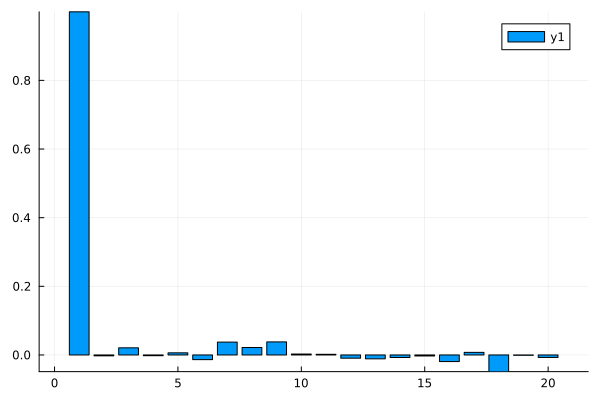

In [14]:
bar([x[end] for x in vec(sxs)])

In [15]:
yy = v_unbind(sym_spk, v_bind(fac_spk[1],fac_spk[3], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17903 spikes.

In [16]:
sys = similarity_outer(yy, Y_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … -0.00010877 -0.00012049]  …  [-1.0 -1.0 … -0.0202652 -0.0202711]

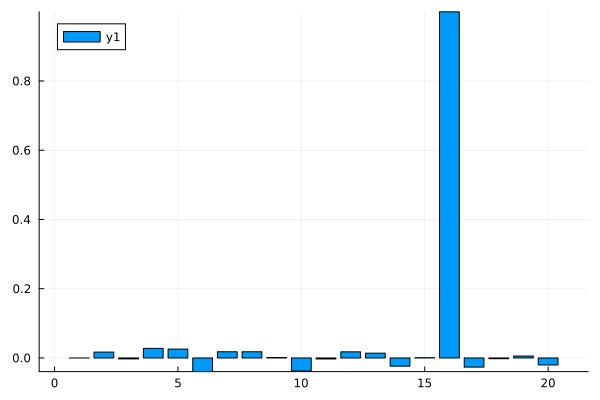

In [17]:
bar([x[end] for x in vec(sys)])

In [18]:
zz = v_unbind(sym_spk, v_bind(fac_spk[1],fac_spk[2], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17992 spikes.

In [19]:
szs = similarity_outer(zz, Z_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … -0.00789612 -0.00787962]  …  [-1.0 -1.0 … -0.00585591 -0.00585165]

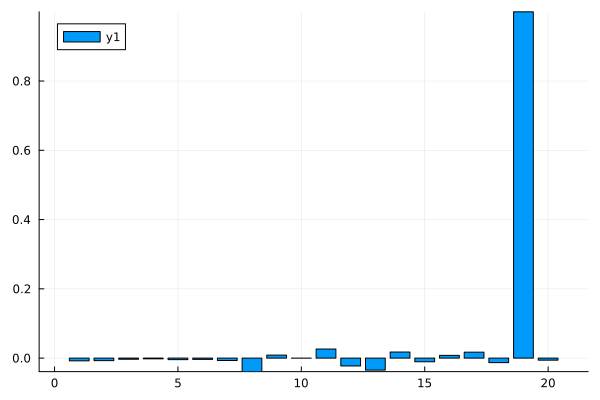

In [20]:
bar([x[end] for x in vec(szs)])

In [21]:
fac_i

3-element Vector{Int64}:
  1
 16
 19

In [22]:
function initialize_guesses(spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real}, codebooks::SpikeTrain...)
    function inner(codebook::SpikeTrain)
        return v_bundle(codebook, dims=1, tspan=tspan, spk_args=spk_args)
    end

    guesses = collect(map(inner, codebooks))
    return guesses
end

initialize_guesses (generic function with 2 methods)

In [23]:
x_cb, y_cb, z_cb = initialize_guesses(X_cb, Y_cb, Z_cb)

3-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443]
 [0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777]
 [0.13805197132714905 -0.7830481773267493 … -0.2737929510652372 -0.4138172421881136]

In [24]:
x_cbs, y_cbs, z_cbs = initialize_guesses(sa, tspan, X_cb2, Y_cb2, Z_cb2)

3-element Vector{SpikeTrain}:
 Spike Train: (1, 1024) with 20480 spikes.
 Spike Train: (1, 1024) with 20480 spikes.
 Spike Train: (1, 1024) with 20480 spikes.

In [25]:
similarity(train_to_phase(x_cbs, spk_args=sa)[end-1,1:1,:], x_cb)

1×1 Matrix{Float64}:
 0.999803327466654

In [26]:
similarity(train_to_phase(y_cbs, spk_args=sa)[end-1,1:1,:], y_cb)

1×1 Matrix{Float64}:
 0.9997897514548254

In [27]:
similarity(train_to_phase(z_cbs, spk_args=sa)[end-1,1:1,:], z_cb)

1×1 Matrix{Float64}:
 0.9998105755853857

In [28]:
fac_i

3-element Vector{Int64}:
  1
 16
 19

In [29]:
function refine(composite::SpikeTrain, factor_codebook::SpikeTrain, external::Array{<:SpikeTrain}, spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real})
    #bind the symbols for external factors
    bindfn = (x, y) -> v_bind(x, y, spk_args=spk_args, tspan=tspan)
    external = reduce(bindfn, external)
    #return external

    #unbind external factors from the composite symbol
    factor = v_unbind(composite, external, spk_args=spk_args, tspan=tspan)

    #calculate the similarity to the codebook
    s = similarity_outer(factor_codebook, factor, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)
    w = reshape(abs.([x[end] for x in vec(s)]), (1, :))
    new_guess = v_bundle_project(factor_codebook, w, zeros((size(w,1), size(factor_codebook)[2])), spk_args=spk_args, tspan=tspan)
    return new_guess
end

refine (generic function with 2 methods)

In [30]:
r = refine(sym_spk, X_cb2, [y_cbs, z_cbs], sa, tspan)

Spike Train: (1, 1024) with 20362 spikes.

In [31]:
sr = similarity_outer(X_cb2, r, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

20×1 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.2465701229758458 0.24656918269795683]
 [-1.0 -1.0 … 0.17410003071590555 0.17409991966097677]
 [-1.0 -1.0 … 0.16902817231580888 0.16901589995400187]
 [-1.0 -1.0 … 0.1166810502869206 0.11667663427686863]
 [-1.0 -1.0 … 0.24475470844466143 0.24478464880518103]
 [-1.0 -1.0 … 0.06155991436062153 0.06156506335866128]
 [-1.0 -1.0 … 0.07225679974689217 0.07224952269448784]
 [-1.0 -1.0 … 0.1371416427753369 0.1371255485135247]
 [-1.0 -1.0 … 0.10618819884636904 0.10621550859472306]
 [-1.0 -1.0 … 0.4358385037329709 0.43583005695733507]
 [-1.0 -1.0 … 0.2906942980810893 0.2906986202770308]
 [-1.0 -1.0 … 0.17183549969322606 0.17185127551344165]
 [-1.0 -1.0 … 0.02504569640620767 0.025059510465386178]
 [-1.0 -1.0 … 0.15913914339669555 0.15915565855832212]
 [-1.0 -1.0 … 0.21390405680814997 0.21391045847078866]
 [-1.0 -1.0 … 0.07623770061037344 0.07627772627603466]
 [-1.0 -1.0 … 0.0752550178293162 0.07524892420836753]
 [-1.0 -1.0 … 0.28858547308040206 0.288587

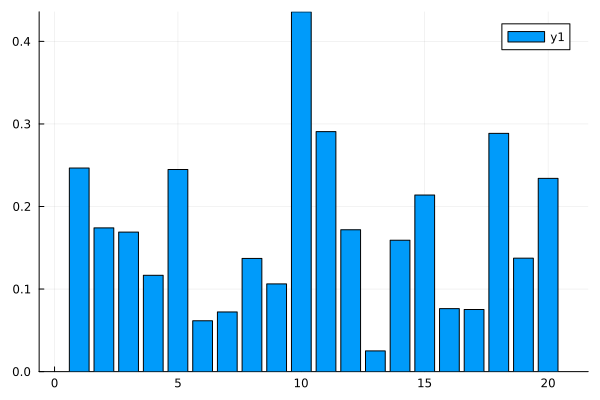

In [32]:
bar([x[end] for x in vec(sr)])

In [33]:
function resonate(composite::SpikeTrain, spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real}, iterations::Int, codebooks::SpikeTrain...)
    n_factors = length(codebooks)
    i_factors = collect(1:n_factors)
    #create the initial guesses for the symbol components
    components = initialize_guesses(spk_args, tspan, codebooks...)
    guesses = [components, ]

    #refine the guess on one factor
    function refine_inner(ind::Int, components)
        #what is the factor we are refining
        factor = components[ind]
        #what are the other factors
        external_i = setdiff(i_factors, ind)
        externals = components[external_i]
        #refine the factor
        refined_factor = refine(composite, codebooks[ind], externals, spk_args, tspan)
        return refined_factor
    end

    for iter in 1:iterations
        new_guesses = [refine_inner(i, guesses[iter]) for i in 1:n_factors]
        push!(guesses, new_guesses)
    end

    return guesses
end

resonate (generic function with 2 methods)

In [34]:
g = resonate(sym_spk, sa, tspan, 10,  X_cb2, Y_cb2, Z_cb2)

11-element Vector{Vector{SpikeTrain}}:
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20362 spikes., Spike Train: (1, 1024) with 20352 spikes., Spike Train: (1, 1024) with 20314 spikes.]
 [Spike Train: (1, 1024) with 20387 spikes., Spike Train: (1, 1024) with 20384 spikes., Spike Train: (1, 1024) with 20405 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes.,

In [35]:
function final_similarity(train::SpikeTrain, codebook::SpikeTrain; spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real})
    sim = similarity_outer(train, codebook, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)
    sim_final = [s[end] for s in sim]
    return sim_final
end

final_similarity (generic function with 1 method)

In [36]:
xmapfn = x -> final_similarity(x[1], X_cb2, spk_args=sa, tspan=tspan)

#74 (generic function with 1 method)

In [37]:
xsims = cat(map(xmapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.199941   0.218738     0.191108   …   0.207674      0.187578
 0.246569   0.1741       0.169016       0.137378      0.234043
 0.668003   0.099892     0.10032        0.146282      0.15244
 0.964073   0.0301679    0.035728       0.00229928    0.0675012
 0.998069   0.000710277  0.0280221      0.00156826   -0.0042045
 0.997993  -1.57171e-5   0.0293736  …  -0.000418914  -0.00388709
 0.998     -0.000250104  0.0297241     -0.000577139  -0.0044211
 0.998002  -0.00026628   0.0297387     -0.000591068  -0.00442725
 0.998002  -0.00027143   0.0297403     -0.000591242  -0.00442731
 0.998002  -0.000271922  0.0297401     -0.000591854  -0.00442752
 0.998002  -0.000271983  0.0297401  …  -0.000591852  -0.00442755

In [38]:
ymapfn = x -> final_similarity(x[2], Y_cb2, spk_args=sa, tspan=tspan)

#76 (generic function with 1 method)

In [39]:
ysims = cat(map(ymapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.204488    0.207741    0.18809     …   0.179894    0.165312     0.173208
 0.112101    0.245541    0.280147        0.390466    0.212609     0.0643037
 0.0746499   0.262836    0.188773        0.212751    0.246603     0.0504585
 0.0150588   0.0198787   0.0227636       0.00537628  0.0204971   -0.0125016
 0.0030809   0.0227174  -0.00310985     -0.00136348  0.00789273  -0.0102389
 0.00180993  0.0242513  -0.00365467  …  -0.00157497  0.00654914  -0.0115341
 0.00185523  0.0242197  -0.00360073     -0.00157787  0.00638036  -0.0115068
 0.00182528  0.0242146  -0.00361421     -0.00157658  0.0063648   -0.0114892
 0.00182293  0.0242139  -0.00361408     -0.00157782  0.00636617  -0.0114828
 0.00182304  0.0242142  -0.00361436     -0.00157811  0.00636616  -0.011482
 0.00182305  0.0242142  -0.0036144   …  -0.00157814  0.00636618  -0.0114819

In [40]:
zmapfn = x -> final_similarity(x[3], Z_cb2, spk_args=sa, tspan=tspan)

#78 (generic function with 1 method)

In [41]:
zsims = cat(map(zmapfn, g)..., dims=1)

11×20 Matrix{Float64}:
  0.177426      0.205254    …   0.207731    0.197474   0.201449
  0.0521365     0.105659        0.304976    0.274773   0.178939
  0.0094901     0.201687        0.00713406  0.702037   0.241374
  0.0111368     0.070272        0.0292154   0.975522   0.00204324
 -0.000936226  -0.00424626     -0.0130899   0.998126  -0.000529111
 -0.00485073   -0.00210593  …  -0.00708424  0.998416  -0.0010796
 -0.0047951    -0.00228919     -0.00684756  0.998386  -0.000803104
 -0.00475249   -0.00228796     -0.00682176  0.998383  -0.000750801
 -0.00475026   -0.0022866      -0.0068164   0.998382  -0.000748245
 -0.00475028   -0.00228666     -0.00681612  0.998382  -0.000748132
 -0.00475021   -0.00228672  …  -0.00681607  0.998382  -0.000748097

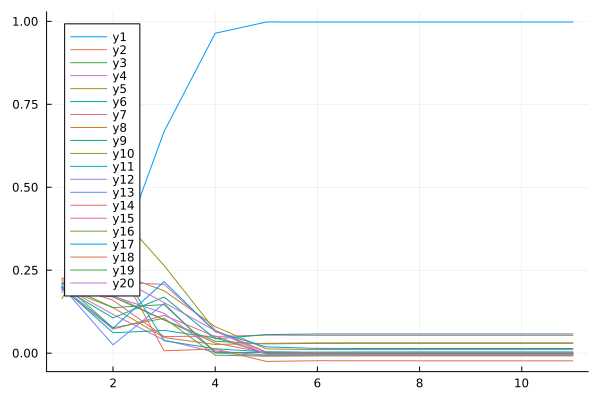

In [42]:
plot(xsims)

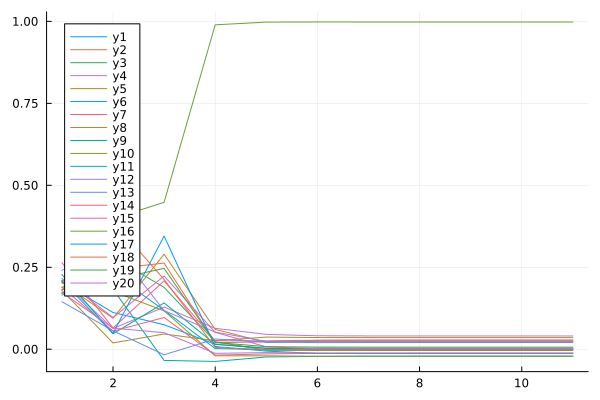

In [43]:
plot(ysims)

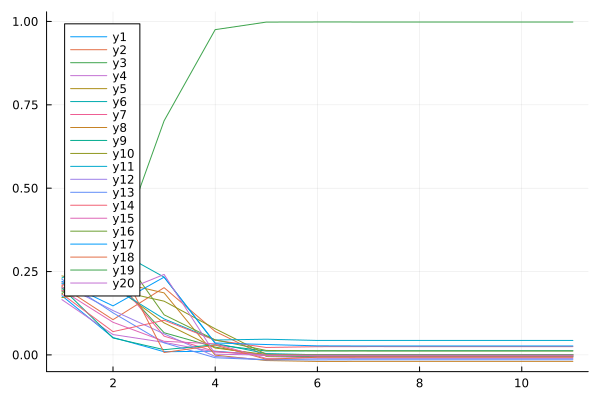

In [44]:
plot(zsims)

In [45]:
allsims = stack((xsims', ysims', zsims'), dims=1)

3×20×11 Array{Float64, 3}:
[:, :, 1] =
 0.199941  0.218738  0.191108  0.202511  …  0.221809  0.207674  0.187578
 0.204488  0.207741  0.18809   0.20913      0.179894  0.165312  0.173208
 0.177426  0.205254  0.188932  0.165763     0.207731  0.197474  0.201449

[:, :, 2] =
 0.246569   0.1741    0.169016  0.116677   …  0.288588  0.137378  0.234043
 0.112101   0.245541  0.280147  0.0632253     0.390466  0.212609  0.0643037
 0.0521365  0.105659  0.233692  0.0610292     0.304976  0.274773  0.178939

[:, :, 3] =
 0.668003   0.099892  0.10032    …  0.00717418  0.146282  0.15244
 0.0746499  0.262836  0.188773      0.212751    0.246603  0.0504585
 0.0094901  0.201687  0.0664731     0.00713406  0.702037  0.241374

;;; … 

[:, :, 9] =
  0.998002    -0.00027143   0.0297403   …  -0.000591242  -0.00442731
  0.00182293   0.0242139   -0.00361408      0.00636617   -0.0114828
 -0.00475026  -0.0022866   -0.00484948      0.998382     -0.000748245

[:, :, 10] =
  0.998002    -0.000271922   0.0297401   …  -0.

In [46]:
function extract_trends(factor, sims)
    n = size(sims,1)
    others = setdiff(1:n, factor)

    correct = sims[factor,:]
    incorrect = sims[others,:]

    return correct, incorrect
end

extract_trends (generic function with 1 method)

In [47]:
xc, xi = extract_trends(fac_i[1], xsims')

([0.1999405515457615, 0.24656918269795683, 0.6680026575252258, 0.9640729744923138, 0.998068931001284, 0.9979933656149411, 0.9979996623352029, 0.9980015583836835, 0.9980015648869336, 0.9980015337264121, 0.9980015404767262], [0.21873809834030025 0.17409991966097677 … -0.0002719219835069942 -0.0002719827813967707; 0.19110770219789394 0.16901589995400187 … 0.02974007339225332 0.029740117601712933; … ; 0.20767413400144827 0.13737769839482455 … -0.0005918541650477294 -0.0005918519753206185; 0.18757779987924011 0.23404310784642068 … -0.004427518275203053 -0.004427545042494662])

In [48]:
xc

11-element Vector{Float64}:
 0.1999405515457615
 0.24656918269795683
 0.6680026575252258
 0.9640729744923138
 0.998068931001284
 0.9979933656149411
 0.9979996623352029
 0.9980015583836835
 0.9980015648869336
 0.9980015337264121
 0.9980015404767262

In [49]:
xi

19×11 Matrix{Float64}:
 0.218738  0.1741     0.099892     0.0301679    …  -0.000271922  -0.000271983
 0.191108  0.169016   0.10032      0.035728         0.0297401     0.0297401
 0.202511  0.116677   0.0394281    0.00255696      -0.00120419   -0.00120414
 0.225626  0.244785   0.187947     0.0799418        0.0106039     0.0106039
 0.198299  0.0615651  0.0683906    0.0461297       -0.00273744   -0.00273741
 0.194882  0.0722495  0.113753     0.0501582    …   0.0536182     0.0536182
 0.196364  0.137126   0.0469419    0.0260456        0.0311313     0.0311314
 0.197759  0.106216   0.168997     0.0430518        0.0577982     0.0577982
 0.164331  0.43583    0.264146     0.0687355        0.00160301    0.00160299
 0.210099  0.290699   0.0373943    0.0131521        0.00363429    0.00363435
 0.183891  0.171851   0.120163     0.00626003   …  -0.00342484   -0.00342482
 0.200466  0.0250595  0.149672     0.000484582     -0.00671588   -0.00671589
 0.210781  0.159156   0.0500078    0.0514175       -0.002

In [50]:
function extract_all_trends(factors, sims...)
    results = [extract_trends(factors[i], sims[i]) for i in 1:length(sims)]
    correct = stack([r[1] for r in results], dims=1)
    incorrect = cat([r[2] for r in results]..., dims=1)
    return correct, incorrect
end

extract_all_trends (generic function with 1 method)

In [51]:
all_c, all_i = extract_all_trends(fac_i, xsims', ysims', zsims')

([0.1999405515457615 0.24656918269795683 … 0.9980015337264121 0.9980015404767262; 0.2049492454201483 0.3983277266161235 … 0.9980777583393019 0.9980777581097989; 0.19747370728189406 0.2747730538235839 … 0.9983823718286662 0.9983823627577203], [0.21873809834030025 0.17409991966097677 … -0.0002719219835069942 -0.0002719827813967707; 0.19110770219789394 0.16901589995400187 … 0.02974007339225332 0.029740117601712933; … ; 0.20773060747782784 0.3049759445660199 … -0.006816121529693683 -0.006816069793933328; 0.20144944343933718 0.17893908662354557 … -0.0007481320706441658 -0.0007480967246932483])

In [52]:
all_c |> size

(3, 11)

In [53]:
all_i |> size

(57, 11)

In [54]:
function check(factors, sims...)
    function inner(factor, sim)
        return factor == argmax(sim[:,end]) ? true : false
    end

    correct = [inner(factors[i], sims[i]) for i in 1:length(sims)]
    return correct
end

check (generic function with 1 method)

In [55]:
check(fac_i, xsims', ysims', zsims')

3-element Vector{Bool}:
 1
 1
 1

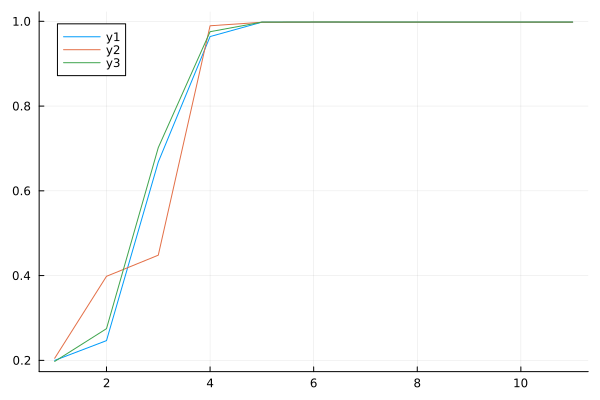

In [56]:
plot(all_c')

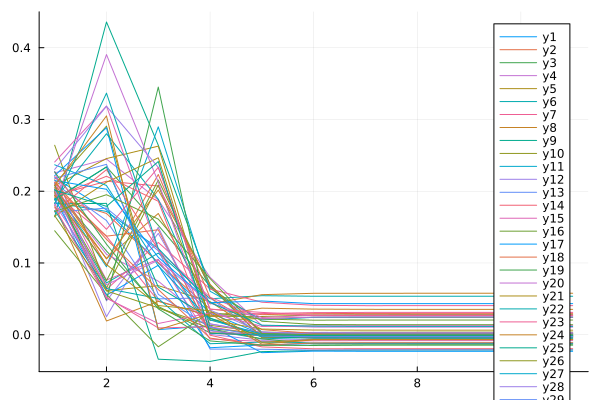

In [57]:
plot(all_i')

In [58]:
fac_i

3-element Vector{Int64}:
  1
 16
 19

In [59]:
rng0

Xoshiro(0xe5c3104c70b513e3, 0x459b2b2b627f8269, 0xda8dfa6c056cb4ee, 0xc0f95e7204032f33, 0xc90c4a0730db3f7e)

In [92]:
function factor3_test_spiking(rng::AbstractRNG, n_cb::Int, n_iters::Int, spk_args::SpikingArgs, repeats::Int)
    #set the simulation timespan
    tspan = (0.0, spk_args.t_period * repeats)
    #generate the codebooks and composition given the rng & convert to spikes to drive oscillators
    p2t = x -> phase_to_train(x, spk_args=spk_args, repeats = repeats)
    X_cb = random_symbols((n_cb, n_vsa), rng) |> p2t
    Y_cb = random_symbols((n_cb, n_vsa), rng) |> p2t
    Z_cb = random_symbols((n_cb, n_vsa), rng) |> p2t
    
    fac_i, fac, sym = generate_composition(rng, spk_args, tspan, X_cb, Y_cb, Z_cb)
    
    #initialize the guesses
    x_cb, y_cb, z_cb = initialize_guesses(spk_args, tspan, X_cb, Y_cb, Z_cb)
    #resonate the factors
    g = resonate(sym, spk_args, tspan, n_iters, X_cb, Y_cb, Z_cb)

    function final_similarity(train::SpikeTrain, codebook::SpikeTrain)
        sim = similarity_outer(train, codebook, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)
        sim_final = [s[end] for s in sim]
        return sim_final
    end

    #measure the result's similarity to the original symbols
    xmapfn = x -> final_similarity(x[1], X_cb)
    ymapfn = x -> final_similarity(x[2], Y_cb)
    zmapfn = x -> final_similarity(x[3], Z_cb)
    
    xsims = cat(collect(map(xmapfn, g))..., dims=1)'
    ysims = cat(collect(map(ymapfn, g))..., dims=1)'
    zsims = cat(collect(map(zmapfn, g))..., dims=1)'

    #check the correctness of the resonated factors
    acc = check(fac_i, xsims, ysims, zsims)
    trends = extract_all_trends(fac_i, xsims, ysims, zsims)

    return acc, trends
    
end

factor3_test_spiking (generic function with 1 method)

In [93]:
@time a0, t0 = factor3_test_spiking(rng0, 20, sa, 20)

389.390219 seconds (79.95 M allocations: 1.144 TiB, 20.76% gc time, 0.03% compilation time)


(Bool[1, 1, 1], ([0.1908785872806062 0.3730223181675437 … 0.9976755825502016 0.9976755690528676; 0.1959637921074972 0.060291022739074544 … 0.9967829400786905 0.9967829465948228; 0.18980910888081884 0.19526131037371353 … 0.9977194223076117 0.9977194146239183], [0.19352710817325025 0.16044570581162776 … -0.0024053853339919083 -0.002405379969675008; 0.25674807527968846 0.22028158623443128 … -0.003311509973863787 -0.003311520656127976; … ; 0.22686149739731207 0.3585081946629872 … -0.007519527022019103 -0.007519525829758579; 0.20831426255010593 0.0145694805360623 … 0.006720670485164129 0.006720667129432381]))

In [94]:
a0

3-element Vector{Bool}:
 1
 1
 1

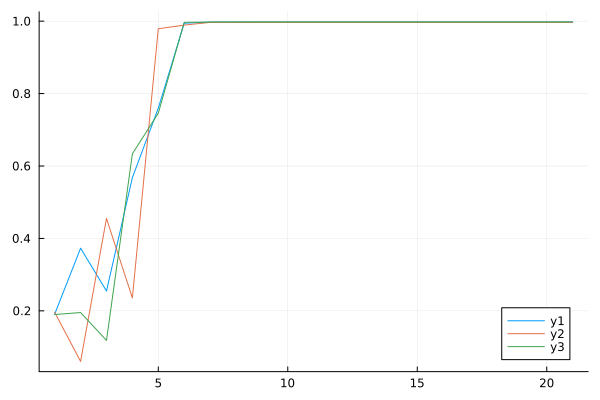

In [97]:
plot(t0[1]')

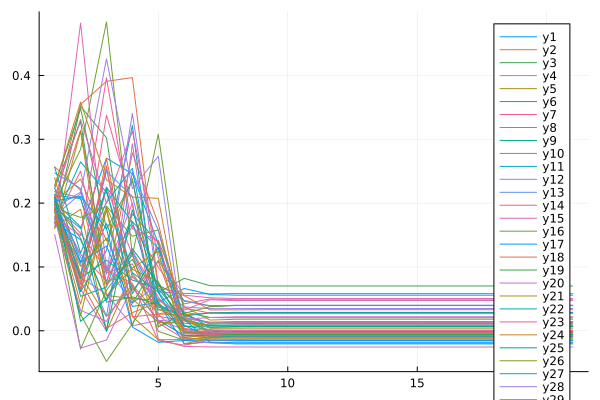

In [99]:
plot(t0[2]')

In [56]:
experiment = [factor3_test(rng0, 20) for i in 1:1000];

In [57]:
using Base.Iterators: flatten

In [58]:
accuracies = cat([e[1] for e in experiment],  dims=1) |> flatten |> collect

3000-element Vector{Bool}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [59]:
using Statistics: mean

In [60]:
mean(accuracies)

0.9833333333333333

In [62]:
pos_trends = stack([e[2][1] for e in experiment], dims=1)

1000×3×21 Array{Float64, 3}:
[:, :, 1] =
 0.191462  0.163048  0.217741
 0.19962   0.191558  0.203892
 0.199048  0.218363  0.229928
 0.197859  0.242845  0.251877
 0.190492  0.195704  0.190195
 0.215992  0.185864  0.22131
 0.20083   0.191592  0.210418
 0.19508   0.221984  0.203645
 0.181254  0.205519  0.215696
 0.184777  0.165558  0.20472
 0.227677  0.195236  0.194611
 0.183781  0.198858  0.179388
 0.162785  0.191705  0.194323
 ⋮                   
 0.196139  0.189059  0.192452
 0.186855  0.176306  0.214268
 0.164998  0.175373  0.198217
 0.198783  0.214874  0.13079
 0.174283  0.202912  0.189871
 0.214235  0.200343  0.180248
 0.205731  0.180693  0.220574
 0.152971  0.200647  0.173163
 0.198156  0.218586  0.221461
 0.193917  0.221847  0.183442
 0.233884  0.211595  0.189942
 0.21002   0.187078  0.18647

[:, :, 2] =
 0.479714   0.00343564  0.229901
 0.380658   0.11836     0.120621
 0.456424   0.182063    0.526773
 0.624482   0.65011     0.52815
 0.379299   0.0584736   0.202832
 0.384498   0.

In [63]:
pt2 = reshape(collect(flatten(pos_trends)), (3000, 21))

3000×21 Matrix{Float64}:
 0.191462  0.479714   0.115926    0.640581  …  0.998482  0.998482  0.998482
 0.19962   0.380658   0.0526016   0.844017     0.998031  0.998031  0.998031
 0.199048  0.456424   0.726502    0.993241     0.997873  0.997873  0.997873
 0.197859  0.624482   0.982253    0.996738     0.996976  0.996976  0.996976
 0.190492  0.379299   0.112154    0.426513     0.997853  0.997853  0.997853
 0.215992  0.384498   0.150407    0.108664  …  0.998697  0.998697  0.998697
 0.20083   0.301748   0.19497     0.972412     0.995737  0.995737  0.995737
 0.19508   0.264836   0.5987      0.981242     0.998388  0.998388  0.998388
 0.181254  0.01649    0.482271    0.10336      0.998397  0.998397  0.998397
 0.184777  0.0658252  0.572707    0.442239     0.997034  0.997034  0.997034
 0.227677  0.337674   0.965411    0.995021  …  0.997242  0.997242  0.997242
 0.183781  0.577712   0.69566     0.996258     0.996261  0.996261  0.996261
 0.162785  0.391386   0.684401    0.99622      0.996089  0.9960

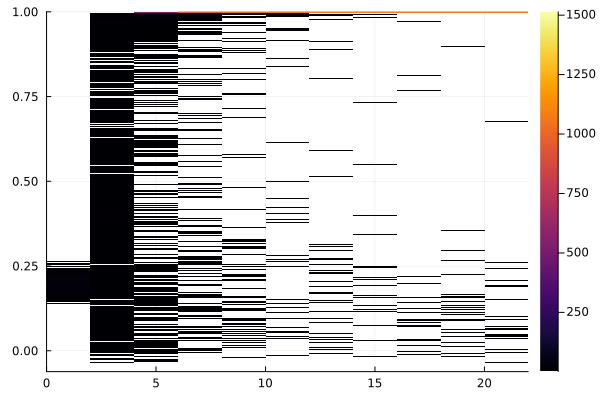

In [66]:
histogram2d(repeat(collect(1:21), 3000), pt2' |> vec)

In [67]:
neg_trends = stack([e[2][2] for e in experiment], dims=1)

1000×57×21 Array{Float64, 3}:
[:, :, 1] =
 0.202832  0.216891  0.18971   0.198281  …  0.157297  0.232195  0.209095
 0.203976  0.219192  0.164243  0.169352     0.182036  0.213263  0.180035
 0.217036  0.145514  0.238708  0.23935      0.208881  0.203984  0.173819
 0.195755  0.182835  0.19564   0.18662      0.220696  0.210308  0.214136
 0.194021  0.256406  0.168381  0.214029     0.1775    0.226219  0.208816
 0.210394  0.193284  0.211473  0.179605  …  0.198742  0.208962  0.207276
 0.23189   0.229773  0.231956  0.168095     0.180183  0.207459  0.202056
 0.194362  0.211623  0.192961  0.171227     0.172601  0.187171  0.198349
 0.187748  0.218677  0.188554  0.252127     0.22667   0.21414   0.207942
 0.193705  0.190163  0.195336  0.201307     0.207951  0.223896  0.183549
 0.244075  0.177799  0.194945  0.193764  …  0.18917   0.200519  0.219815
 0.240393  0.184804  0.183818  0.196948     0.179681  0.185786  0.185607
 0.201233  0.18207   0.169583  0.226592     0.156201  0.199078  0.224806
 ⋮       

In [69]:
nt2 = reshape(collect(flatten(neg_trends)), (1000*57, 21))

57000×21 Matrix{Float64}:
 0.202832  0.0612663   0.195981     0.0970808   …   0.00972386    0.00972386
 0.203976  0.379038    0.176203     0.209832        0.000694172   0.000694172
 0.217036  0.180398    0.0735505    0.00396851      0.000515637   0.000515637
 0.195755  0.0384332   0.00700594  -0.0115553      -0.0118255    -0.0118255
 0.194021  0.163116    0.317386     0.12213        -0.00314158   -0.00314158
 0.210394  0.0585165   0.105795     0.0426804   …   0.0288935     0.0288935
 0.23189   0.0562474   0.111995     0.0515179       0.0649914     0.0649914
 0.194362  0.396898    0.0282568    0.0396866       0.0674613     0.0674613
 0.187748  0.300568    0.229577     0.334349       -0.00643957   -0.00643957
 0.193705  0.116153   -0.0135755    0.0134222      -0.0172       -0.0172
 0.244075  0.263303    0.108125     0.0808983   …   0.0766859     0.0766859
 0.240393  0.0650561   0.0866594   -0.00982091     -0.0122729    -0.0122729
 0.201233  0.111026    0.105099     0.0278535       0.0128

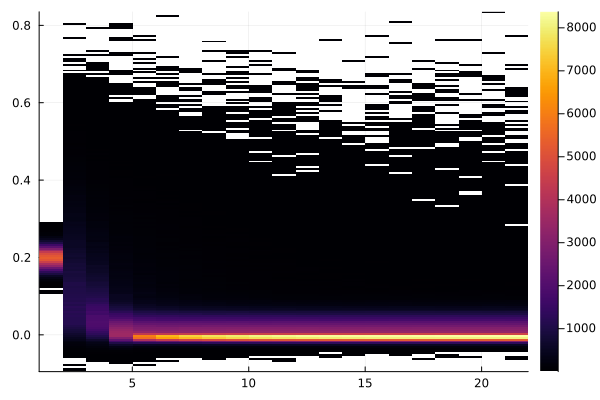

In [70]:
histogram2d(repeat(collect(1:21), 57000), nt2' |> vec)

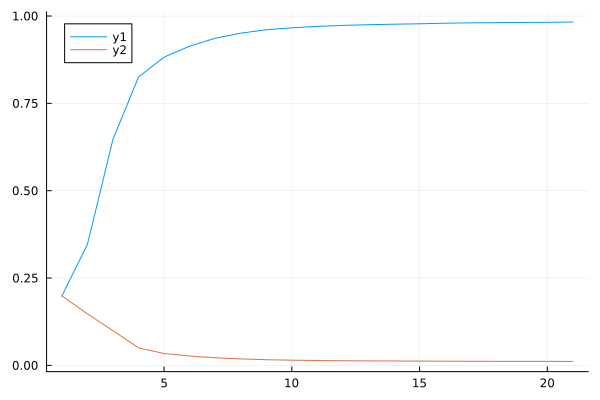

In [76]:
plot(mean(pt2, dims=1)')
plot!(mean(nt2, dims=1)')